# FINAL PROJECT - The Titanic shipwreck

##### In this project, I will attempt to analyze the Titanic Shipwreck data. I will do using Data Analytics process which is detailed below: 

1. **Posing questions:** In this phase, questions are raised or posed about the data that is going to be explored or
     investigated. You can also first explore the data a little bit and then pose your questions.

2. **Data Wrangling:** In this phase, data is acquired and then cleaned for easy analysis. For instance, if the data is not in csv format, we load it in csv format and then analyze it.  

3. **Exploration:** In this phase, data analysts explore the data as the name suggests and try to look for patterns that will help us solve our questions...  

4. **Drawing conclusions:** In this phase, DAs (data analysts) draw conclusions based on their data. 

5. **Communication:** In this phase, the findings are communicated via an email, a blogpost, a power point presentation, a book, etc.

### Onto the first step:-

## POSING QUESTIONS 

**Here are the questions that I have prepared:** 

1. What is the distribution of male and female data in the sample? Was there any correlation between gender and the survival rate? if so, which gender had more survival rate, why possibly? Were there any empty values fields?  
    
2. What is the distribution of male and female data in the sample? Was there any correlation between gender and the survival rate? if so, which gender had more survival rate, why possibly? Were there any empty values fields?

3. What are the percentages of passengers in each class? Did the class of the passengers identified as Pclass have any impact on the survival? If so, which ticket class had the best survival rate? 
    
4. Did more or fewer people travel with their families? What was the correlation between a passenger having a family member and the survival rate for such groups? 

### Onto the second step:-

## DATA WRANGLING

** Let us try to take a look at the data and convert it if we need to.**

In [4]:
#I am going to store the value of the filepath in the following variable. 
titanic_file = "https://github.com/Saboorhub/investigate_dataset"

#I am going to import the following modules so I can use them later in the data wrangling and visualization stages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#I am going to use the following pandas function to read the file and store the value in the titanic_df variable.
titanic_df = pd.read_csv(titanic_file)


#### Titanic Data Description: 

Let us learn a little bit about our data. The following features describe the titanic data: 

1. **_Passengerid_:** This is the passenger id starting from 1 to 891. 

2. **_Survived_:** The value is numerical of 0 or 1.1 indicating the passenger survived and 0 otherwise.

3. **_Pclass_:** Also numerical values of 1, upper deck; 2, middle deck; and 3, bottom deck. 

4. **_Name_:** This column lists the name of passenger. 

5. **_Sex_:** This column lists the gender of the passenger. 

6. **_Age_:** This column shows the age of passenger in years. 

7. **_SibSp_:** This column shows the number of sibling/siblings or a spouse of the passenger if any.  

8. **_Parch_:** This column shows the number of a parent/parents or child/children of the passenger if any. 

9. **_Ticket_:** This shows the ticket number of the ticket issued. 

10. **_Fare_:** This shows the fare the ticket is bought at. 

11. **_Cabin_:** This shows the cabin number. 

12. **_Embarked_:** This shows the port the passenger embarked at. C = Cherbourg, Q = Queenstown, S = Southampton

Credit: https://www.kaggle.com/c/titanic/data

**Here are the first few records of the titanic data.** 

In [150]:
#here are the top few records from the titanic_df
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [151]:
#Here are some stats about the data. 

titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Before taking a look at the number of survivors. Let us make sure the survived column does not have any null values. **

In [152]:
def null_values(data, column):
    """
    This function returns an integer representing count of empty fields in a column specified.
    """
    return len(data[data[column].isnull() == True])
    
null_values(titanic_df, 'Survived') #It seems like it is 0. So we can go ahead. 

0

In [153]:
#I am going to create a function using lambda built-in function and store it in select_df variable. This function
#will return a df with whatever inputs given. 

select_df = lambda x, y, z: x[x[y] == z]
survivors_df = select_df(titanic_df, 'Survived', 1)
survivors_count = len(survivors_df)


In [154]:
#let us first of all see if there are any null values. 

null_values(titanic_df, 'Sex')

0

In [155]:
#Since there are no empty column values for gender, we can move ahead with the unchanged data. 
#Let us find out how many males and how many females are there in the sample. 

male_count = len(select_df(titanic_df, 'Sex', 'male'))
female_count = len(select_df(titanic_df, 'Sex', 'female'))

male_survivors_count = len(select_df(survivors_df, 'Sex', 'male'))
female_survivors_count = len(select_df(survivors_df, 'Sex', 'female'))

**Assumptions:** 

* I am going to divide the age_related data into two categories for the sake of simplicity. 
* Those who are 18 years old or older will be considered as adults, and those less than 18 years of age will be considered children. 
* But I will also provide some interesting numbers concerning the ages of those on board the titanic. 


In [156]:
#Let us, first of all, take a look at the age field if there are no empty fields. So we can call the has_empty_fields 
#function

null_values(titanic_df, 'Age')
#it seems like there are 177 records whose ages are unknown so we are going to remove these from the sample
#and create another sample without these records. 

age_inclusive_df = titanic_df[titanic_df['Age'].notnull()]
ageless_count = len(titanic_df) - len(age_inclusive_df)

children_df = age_inclusive_df[age_inclusive_df['Age'] < 18]
child_count = len(children_df)

adults_df = age_inclusive_df[age_inclusive_df['Age'] >= 18]
adult_count = len(adults_df)

child_survivors_count = len(select_df(children_df, 'Survived', 1))
adult_survivors_count = len(select_df(adults_df, 'Survived', 1))

youngest_survivor = survivors_df['Age'].min() * 12
oldest_survivor = survivors_df['Age'].max()

**Titanic Data stats by Pclass**

*There are three classes as defined in Pclass column of the titanic data.*

**Assumptions:**

* I will call the class with Pclass value of 1 first_class
* I will call the class with Pclass value of 2 second_class
* I will call the class with Pclass value of 3 third_class

First of all, let us see if the Pclass column has any empty or null values. After calling the empty_fields_count function for 'Pclass' column, we found out that there are not empty values. 

In [157]:
null_values(titanic_df, 'Pclass') #it seems like the column does not have any null values. 

0

In [158]:
#the following variables store the values of titanic data distribution by ticket class. 

#the following are first class passengers and survivors numbers. 
first_class_count = len(select_df(titanic_df, 'Pclass', 1))
first_class_survivors = len(select_df(survivors_df, 'Pclass', 1))

#the following are second class passengers and survivors numbers. 
second_class_count = len(select_df(titanic_df, 'Pclass', 2))
second_class_survivors = len(select_df(survivors_df, 'Pclass', 2))

#the following are third class passengers and survivors numbers. 
third_class_count = len(select_df(titanic_df, 'Pclass', 3))
third_class_survivors = len(select_df(survivors_df, 'Pclass', 3))


In [159]:
#let us see if there are any empty cells in the Parch and SibSp columns. 

print (null_values(titanic_df, 'Parch'))
print (null_values(titanic_df, 'SibSp'))

0
0


In [160]:
#since there are no null values, let us go ahead and use come up family_traveling and lonely_traveling data using
#vectorized operations as well as the select_df function. 

lonely_travelers_df = titanic_df[(titanic_df['SibSp'] == 0) & (titanic_df['Parch'] == 0)]
lonely_travelers_count = len(lonely_travelers_df)
lonely_traveling_survivors_count = len(select_df(lonely_travelers_df, 'Survived', 1))
family_travelers_df = titanic_df[(titanic_df['SibSp'] > 0) | (titanic_df['Parch'] > 0)]
family_travelers_count = len(family_travelers_df)
family_traveling_survivors_count = len(select_df(family_travelers_df, 'Survived', 1))


### Onto the third step:-


## DATA EXPLORATION 

In total there were 891 in the sample. I will break down the sample size as well as the 
survivors data by gender, age, and ticket class. 

   **1. Distribution of data by gender:** 
   
   Change ***False*** to ***True*** and run the following Python code to see stats related to gender distribution: 
 

In [161]:
samplesize = len(titanic_df)

if True: 
    def printing(**kwargs):
        """
        This function prints the value upon calling the function. 
        """
        for name, value in kwargs.items():
            print ("There were {}".format(value))

    printing(sample_size = str(samplesize)+" people in the sample.", 
             survs = str(survivors_count)+ " survivors.",
            male_num = str(male_count)+ " males.",
             mal_surv = str(male_survivors_count)+ " male survivors.",
            fem_num = str(female_count)+ " females.",
             fem_surv = str(female_survivors_count)+ " female survivors."
            )

There were 891 people in the sample.
There were 342 survivors.
There were 577 males.
There were 109 male survivors.
There were 314 females.
There were 233 female survivors.


   **2. Distribution of data by age:-**

   Change ***False*** to ***True***, and run the following Python code to see stats related to age distribution: 


In [162]:
#the printing function is called to print stats related to age. 

if True: 
    printing(with_age_data_length = str(len(age_inclusive_df))+" people, whose ages were specified.", 
            adults = str(adult_count)+" adults.", 
            children = str(child_count)+" children.", 
            all_survs = str(adult_survivors_count+child_survivors_count)+" survivors, with ages specified.", 
             adult_surv = str(adult_survivors_count)+" adult survivors.", 
             child_surv = str(child_survivors_count)+ " child survivors."
            )
    print ("The oldest survivor was {} years old.".format(oldest_survivor))
    print ("The youngest survivor was {} months old.".format(youngest_survivor))

There were 714 people, whose ages were specified.
There were 601 adults.
There were 113 children.
There were 290 survivors, with ages specified.
There were 229 adult survivors.
There were 61 child survivors.
The oldest survivor was 80.0 years old.
The youngest survivor was 5.04 months old.


   **3. Distribution of data by ticket class:** 
    
   Change ***False*** to ***True***, and run the following Python code to see stats related to ticket class distribution:


In [163]:
#We are going to call the printing function to print stats related to ticket class. 
if True: 
    printing( first_class = str(first_class_count)+" people in first class category.", 
            first_class_survs = str(first_class_survivors)+" survivors in that category.", 
            second_class = str(second_class_count)+" people in second class category.", 
            second_class_survs = str(second_class_survivors)+" survivors in that category.", 
             third_class = str(third_class_count)+" people in third class category.", 
             third_class_survs = str(third_class_survivors)+ " survivors in that category."
            ) 

There were 216 people in first class category.
There were 136 survivors in that category.
There were 184 people in second class category.
There were 87 survivors in that category.
There were 491 people in third class category.
There were 119 survivors in that category.


   **4. Distribution of data by family indicators: **
    
  Change ***False*** to ***True***, and run the following Python code to see stats related to gender distribution:


In [164]:
#We are going to call the printing function to print stats related to family. 
if True: 
    printing(lonely_travelers = str(lonely_travelers_count)+" people, traveling alone.", 
            lonely_traveling_survs = str(lonely_traveling_survivors_count)+" survivors in the lonely category.", 
            family_travelers = str(family_travelers_count)+" people, traveling with family.", 
             family_traveling_survs = str(family_traveling_survivors_count)+" survivors in the family category." 
            ) 

There were 537 people, traveling alone.
There were 163 survivors in the lonely category.
There were 354 people, traveling with family.
There were 179 survivors in the family category.


### Onto the fourth step:-

## CONCLUSION

### Findings:- 

I was able to find answers to the questions I raised. Following are my conclusions: 

1. About survival rate and gender, I found that persons identified as female had a higher survival rate in proportion to their representation in the sample.

2. About survival and age, I found that persons aged less than 18 years had better survival rate in proportion to their representation in the sample. 

3. About survival and ticket class of passengers, I found that passengers who had bought a higher class ticket, had better survival rate compared to the two other classes. 

4. About survival and availability of traveling companion, I found that passengers who were traveling as part of family had better survival rate compared to others who traveled by themselves. 

All of the above findings are backed by data explored and visuals in the upcoming section. 

### Limitations:- 
* The limitations of the findings are the reasons provided in the dataset. For instance, after exploring the data, I
  was able to find out that children and women had better survival rate compared to adults and males. The dataset does
  not mention that children and women were given preference over adults and males. 

* Or the fact that people who were traveling as part of one family had better survival rate because they looked out
  for each other so their survival was better compared to people who were traveling by themsleves. 

* And the dataset also lacks reason for the fact that higher ticket class had better survival because they must have
  been given preference when it came to lifeboats (which is not mentioned in the dataset). But even being on the
  lifeboats does not mean higher chances of survival. 



### Onto the fifth step:-

## COMMUNICATION

## **GENDER: Let us remind ourselves of the questions related to gender ** 

***What is the distribution of male and female data in the sample? Was there any correlation between gender and the survival rate? if so, which gender had more survival rate, why possibly? Were there any empty values fields?*** 

Well, first of all information was collected on 891 people, which is our sample size. Out of the sample size of 891 people, there were 577 people identified as male of which 19% or 109 survived, and 314 people identified as female, of which 74% or 233 survived.  

So yes, there was a correlation between gender and survival rate as the people identified as female had a higher survival rate proportionate to their representation of the sample compared to people identified as male. 

Change ***False*** to ***True*** and run the following code to observe the visualization of the above. 

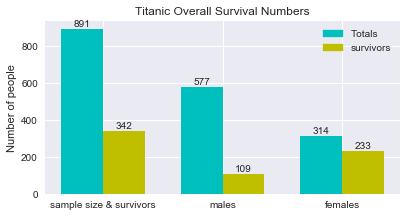

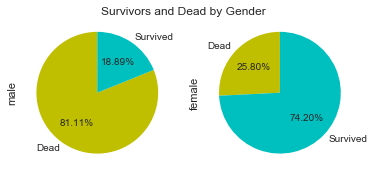

In [165]:
#this is to print out the output in the same notebook. 
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def barlabel(plots):
        """
        This function attaches a text label above each bar displaying its height
        """
        for plot in plots:
            height = plot.get_height()
            ax.text(plot.get_x() + plot.get_width()/2, height,
                    '%d' % int(height),
                    ha='center', va='bottom')

if True: 
    
    N = 3
    x = np.arange(N)  
    width = 0.35      

    fig = plt.figure(figsize=(14,7)) 
    ax = fig.add_subplot(221)

    mf_data1 = (len(titanic_df), male_count, female_count)
    plot_mf1 = ax.bar(x,mf_data1, width, color='c')

    mf_data2 = (survivors_count, male_survivors_count, female_survivors_count)
    plot_mf2 = ax.bar(x+width, mf_data2, width, color='y')

    ax.set_title('Titanic Overall Survival Numbers')
    ax.set_ylabel('Number of people')
    totals_leg = mpatches.Patch(color='c', label='Totals')
    surv_leg = mpatches.Patch(color='y', label='survivors')
    ax.legend(handles = [totals_leg, surv_leg])
    ax.set_xticks(x+width/2)
    ax.set_xticklabels(('sample size & survivors','males','females'))
    
    barlabel(plot_mf1)
    barlabel(plot_mf2)    
    
    survivors_gender_table = pd.crosstab(titanic_df['Survived'], titanic_df['Sex'])
    fig, (ax1, ax2) = plt.subplots(ncols=2)
    colors = ['y','c']
    for sex, ax in zip(['male', 'female'], [ax1, ax2]):
        survivors_gender_table.plot.pie(y = sex, 
                                    ax=ax, 
                                    labels =['Dead', 'Survived'],
                                    autopct='%1.2f%%', 
                                    colors=colors, 
                                    legend=False, 
                                    startangle=90)
        ax.set_aspect('equal')
    fig.suptitle('Survivors and Dead by Gender', y=0.8, fontsize = 12)

**AGE: Let us take a look at the questions related to age.**

***What is the distribution of data based on age? Was there any correlation between age and the chances of survival? Did any particular age group had better survival rate? How old were the oldest and youngest survivors?***

There are two age categories, adults and children. People aged 18 or over are considered adults and those aged less than 18 are considered children. Out of the sample of 891 people, there were 177 people who had no age specifed so we excluded them while analyzing the data between adults and children. So we have a new sample for this analysis with 714 people in it. 

Out of 714 age_inclusive sample, there were 649 adults and 65 children. That is 90% adults and 10% children. The survival rate proportionate to their relevant groups was 39% for adults, that is 255 survivors out of 649 adults, and 54% for children, and that is 35 children survived out of 65 children. Hence, we can say that children had better survival rate when compared to adults. And this could be that children were given priority to board the lifeboats as they were the most vulnerable group. 

Change ***False*** to ***True*** and run the following code to get the visuals backing up the above. 

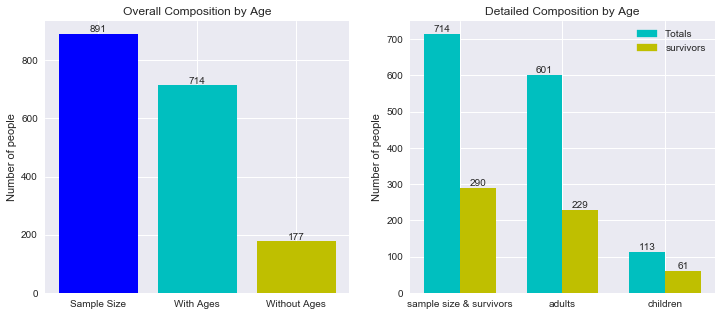

In [166]:
if True:     
    fig = plt.figure(figsize=(12,5)) #the figure along with the size of it.
    ax = fig.add_subplot(121)
    colors = ['b','c','y']
    bar1 = ax.bar(range(3), [len(titanic_df),len(age_inclusive_df), ageless_count], color = colors)
    ax.set(title = 'Overall Composition by Age', 
          ylabel = 'Number of people', 
          xticks = range(3),
          xticklabels = ['Sample Size','With Ages','Without Ages']
          )
    barlabel(bar1)
    
    ax = fig.add_subplot(122)

    ac_data1 = (len(age_inclusive_df), adult_count, child_count)
    plot_ac1 = ax.bar(x,ac_data1, width, color='c')

    ac_data2 = (adult_survivors_count+child_survivors_count, adult_survivors_count, child_survivors_count)
    plot_ac2 = ax.bar(x+width, ac_data2, width, color='y')

    ax.set_title('Detailed Composition by Age')
    ax.set_ylabel('Number of people')
    totals_leg = mpatches.Patch(color='c', label='Totals')
    surv_leg = mpatches.Patch(color='y', label='survivors')
    ax.legend(handles = [totals_leg, surv_leg])
    ax.set_xticks(x+width/2)
    ax.set_xticklabels(('sample size & survivors','adults','children'))


    barlabel(plot_ac1)
    barlabel(plot_ac2)

**TICKET CLASS. Let us tackle the questions related to ticket class of the passengers.**

***What are the proportions of passengers in each class and what are their survival rates? Was there any correlation between ticket class and survival? If so, which ticket classes had the best and worst survival rate?***

*The 891 passengers were grouped into three ticket classes:* 

1. 216 first_class ticket holders (Pclass = '1')
2. 184 second_class ticket holders (Pclass = '2')
3. 491 third_class ticket holders (Pclass = '3')

*Let us take a look at their survival rates:* 

1. 136/216 first_class survivors, 63% survival rate
2. 87/184 second_class survivors, 47% survival rate
3. 119/491 third_class survivors, 24% survival rate

Looking at the above stats, we can clearly see that the first_class had the best survival rate, 62% and the third_class had the worst survival rate of 24%. The ticket class on the titanic represented socio-economic status with first_class being the highest in terms of that status. 

Thus, we can say that there was a correlation between a ticket class and the survival rate. The higher the ticket class, the better the socio-economic status of the passenger and the more likely the passenger survived. 


*Please change **False** to **True** in the following code and then run the code to observe representative visuals.*

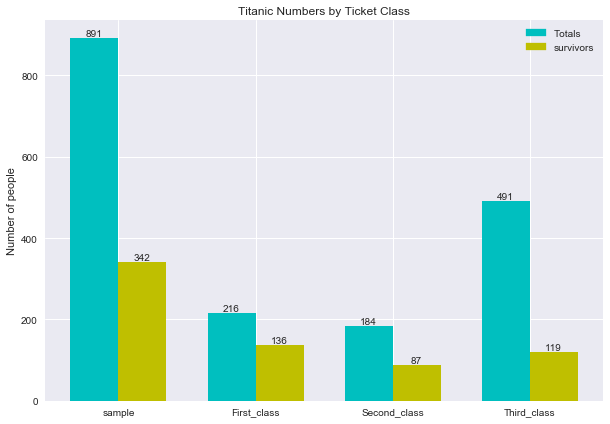

In [167]:
if True: 
    fig = plt.figure(figsize=(10, 7))
    N = 4
    x = np.arange(N)  
    width = 0.35      

    ax = fig.add_subplot(111)

    tc_data1 = (len(titanic_df), first_class_count, second_class_count, third_class_count)
    plot_tc1 = ax.bar(x,tc_data1, width, color='c')

    tc_data2 = (survivors_count, first_class_survivors, second_class_survivors, third_class_survivors)
    plot_tc2 = ax.bar(x+width, tc_data2, width, color='y')

    ax.set_title('Titanic Numbers by Ticket Class')
    ax.set_ylabel('Number of people')
    totals_leg = mpatches.Patch(color='c', label='Totals')
    surv_leg = mpatches.Patch(color='y', label='survivors')
    ax.legend(handles = [totals_leg, surv_leg])
    ax.set_xticks(x+width/2)
    ax.set_xticklabels(('sample', 'First_class','Second_class', 'Third_class'))
    
    barlabel(plot_tc1)
    barlabel(plot_tc2)

**FAMILY Vs LONELY TRAVELERS Let us tackle questions related to whether people traveled with their families or not.**

***Did more or fewer people travel with their families? What was the correlation between a passenger having a family member and the survival rate for such groups?***

Out of 891 people, 537 people traveled by themselves, so they did not have any family onboard. And 354 people travelved either with their children, parents, spouses or siblings. 

It seems like the people who traveled with their families had a better survival rate compared people traveling by themselves. There were 179 survivors out of 354 travelers, which is 50% survival rate. On the other hand, 163 survivors out of 537 travelers, which is every third person or 30% survival rate. 

Thus, family traveling people were more likely to survive than non-family travelers. 

*Please change **False** to **True** in the following code and then run the code to observe representative visuals.*

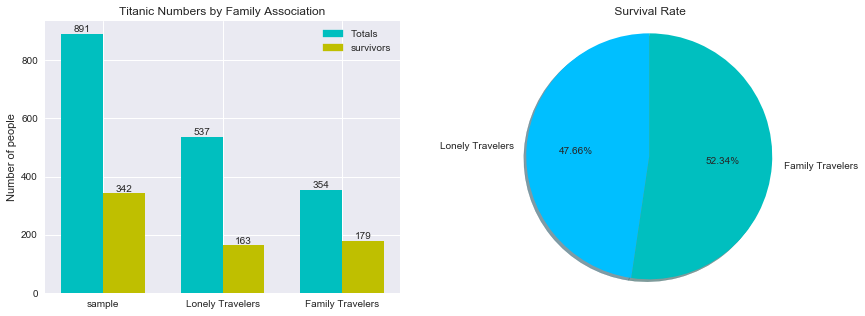

In [168]:
if True: 
    fig = plt.figure(figsize=(14, 5))
    N = 3
    x = np.arange(N)  
    width = 0.35      

    ax = fig.add_subplot(121)

    tc_data1 = (len(titanic_df), lonely_travelers_count, family_travelers_count)
    plot_tc1 = ax.bar(x,tc_data1, width, color='c')

    tc_data2 = (survivors_count, lonely_traveling_survivors_count, family_traveling_survivors_count)
    plot_tc2 = ax.bar(x+width, tc_data2, width, color='y')

    ax.set_title('Titanic Numbers by Family Association')
    ax.set_ylabel('Number of people')
    totals_leg = mpatches.Patch(color='c', label='Totals')
    surv_leg = mpatches.Patch(color='y', label='survivors')
    ax.legend(handles = [totals_leg, surv_leg])
    ax.set_xticks(x+width/2)
    ax.set_xticklabels(('sample', 'Lonely Travelers', 'Family Travelers'))
    
    barlabel(plot_tc1)
    barlabel(plot_tc2)
    
    ax = fig.add_subplot(122)
    slices = [lonely_traveling_survivors_count/survivors_count, family_traveling_survivors_count/survivors_count]
    labels = ['Lonely Travelers', 'Family Travelers']
    colors = ['#00bfff', 'c']
    plt.title(' Survival Rate')
    plt.pie(slices, 
            labels=labels, 
            colors=colors,
            autopct='%1.2f%%', 
           startangle = 90, 
           shadow = True)
    plt.axis('equal')
    

Sources: 

http://matplotlib.org

http://kaggle.com

http://stackoverflow.com/
